<a href="https://colab.research.google.com/github/BhumikaSongara/DSA_Project/blob/main/image_classification_on_cats_and_dogs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteR1RKIC/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp1eyyw7obtfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-in

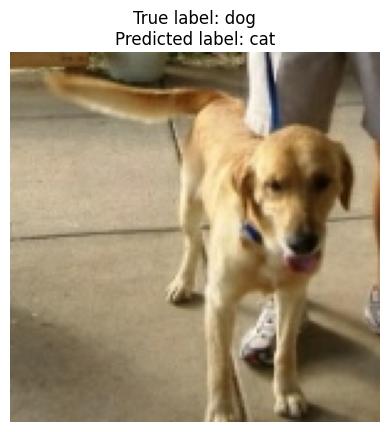

1/1 [==============================] - 0s 18ms/step


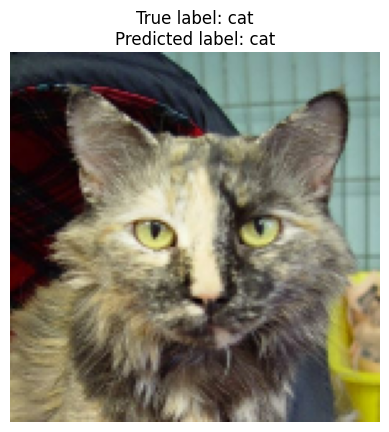

1/1 [==============================] - 0s 22ms/step


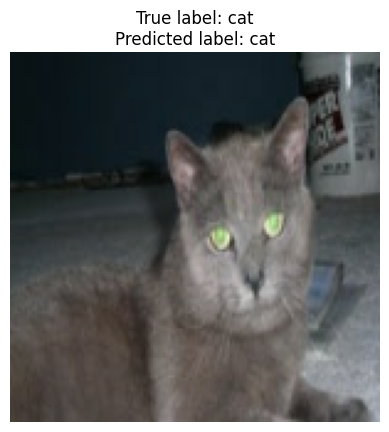

1/1 [==============================] - 0s 17ms/step


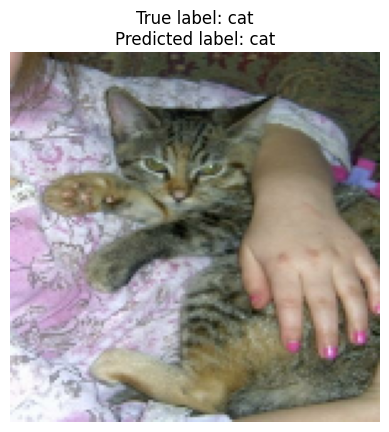

1/1 [==============================] - 0s 34ms/step


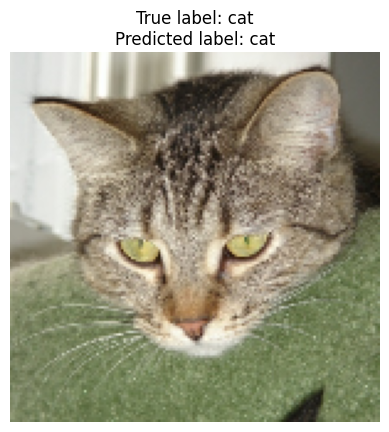

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Load cats vs dogs dataset
(train_ds, test_ds), info = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:]'],
                                      as_supervised=True, with_info=True)

# Show info about the dataset
print(info)

# Function to preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))  # Resize images to a fixed input size
    image = tf.cast(image, tf.float32) / 255.0   # Normalize pixel values to [0,1]
    return image, label

# Apply preprocessing to dataset and add batch dimension
train_ds = train_ds.map(preprocess_image).batch(32)
test_ds = test_ds.map(preprocess_image).batch(32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_ds, epochs=5, validation_data=test_ds)

test_loss, test_acc = model.evaluate(test_ds)
print('\nTest accuracy:', test_acc)

for image, label in test_ds.take(5):
    image = image[0]  # Extracting the first image
    label = label[0]  # Extracting the label of the first image
    predicted_label = model.predict(np.expand_dims(image, axis=0))  # Making prediction

    # Decode label (0: cat, 1: dog)
    predicted_class = "cat" if predicted_label[0][0] < 0.5 else "dog"

    # Plot the image with predicted label
    plt.imshow(image)
    plt.title(f"True label: {'cat' if label == 0 else 'dog'}\nPredicted label: {predicted_class}")
    plt.axis('off')
    plt.show()
